In [45]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

In [46]:
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')['Survived']

In [47]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [48]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 1 Describing data

## 1.1 Survived

In [49]:
d_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5,0.98,'Counts of survival')

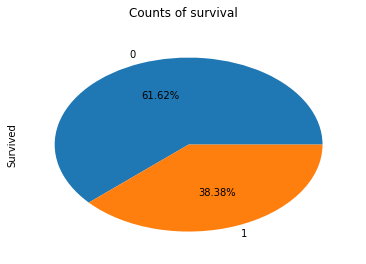

In [50]:
d_train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of survival')

## 1.2 Pclass

In [51]:
d_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5,0.98,'Counts of Pclass')

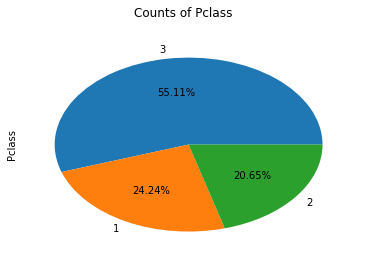

In [52]:
#plot the counts of each value in Pclass
d_train['Pclass'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of Pclass')

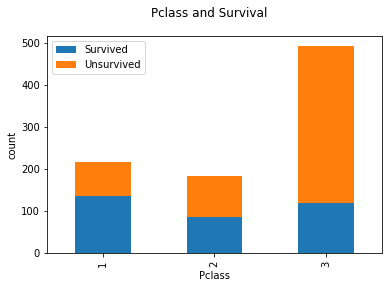

In [53]:
Survived_0 = d_train.Pclass[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Pclass[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Pclass and Survival")
plt.xlabel(u"Pclass") 
plt.ylabel(u"count") 
plt.show()

### According to the above graphs, it seems that people in the 1st class may stand more chances to survive. Therefore, we assume that the Pclass may affect the survival. Also, data of Pclass is numeric and does not have null, so we did not change anything about Pclass when we processed data.

## 1.3 Sex

In [54]:
d_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5,0.98,'Counts of Sex')

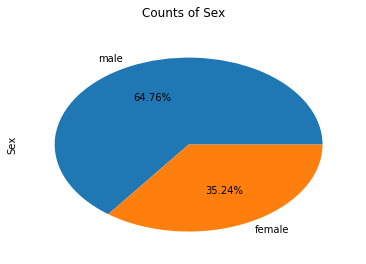

In [55]:
d_train['Sex'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of Sex')

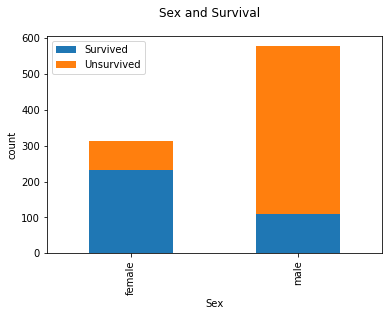

In [56]:
Survived_0 = d_train.Sex[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Sex[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Sex and Survival")
plt.xlabel(u"Sex") 
plt.ylabel(u"count") 
plt.show()

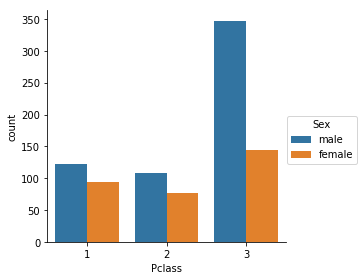

In [57]:
# the relationship between sex, pclass and survival
_ = sns.factorplot('Pclass', data=d_train, hue='Sex', kind="count")

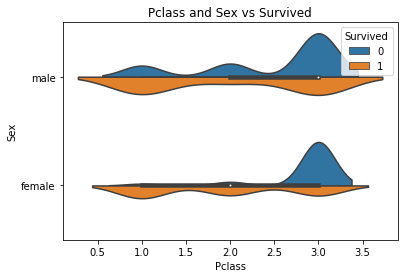

In [58]:
_ = sns.violinplot("Pclass", "Sex", hue="Survived", data=d_train, split=True)
_.set_title('Pclass and Sex vs Survived')

plt.show()

### According to the above graphs, it seems that women is more possible to survive, so we thought this data would have influence on survival. 

## 1.4 Age

In [59]:
d_train['Age'].value_counts()

24.000000    30
22.000000    27
18.000000    26
28.000000    25
30.000000    25
19.000000    25
21.000000    24
25.000000    23
36.000000    22
29.000000    20
27.000000    18
32.000000    18
35.000000    18
26.000000    18
16.000000    17
31.000000    17
20.000000    15
34.000000    15
33.000000    15
23.000000    15
39.000000    14
17.000000    13
42.000000    13
40.000000    13
45.000000    12
38.000000    11
50.000000    10
4.000000     10
2.000000     10
44.000000     9
             ..
42.891197     1
32.133884     1
41.025182     1
27.996668     1
0.420000      1
21.790880     1
31.819194     1
20.742154     1
40.552706     1
34.691682     1
18.200784     1
29.951176     1
34.435516     1
22.662735     1
20.188928     1
21.592728     1
35.025061     1
28.233630     1
31.153090     1
20.007847     1
19.491962     1
41.382112     1
70.500000     1
40.176226     1
24.599379     1
26.859868     1
19.907311     1
19.978153     1
44.143413     1
34.563333     1
Name: Age, Length: 265, 

In [60]:
d_train['Age'].describe()

count    891.000000
mean      29.572518
std       13.533263
min        0.420000
25%       21.000000
50%       28.661172
75%       37.929844
max       80.000000
Name: Age, dtype: float64

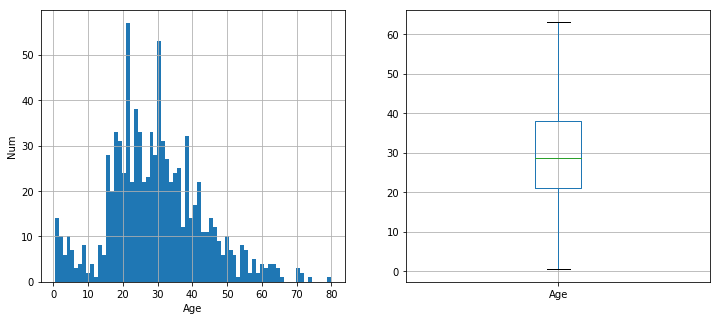

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(121)
d_train['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
d_train.boxplot(column='Age', showfliers=False)
plt.show()

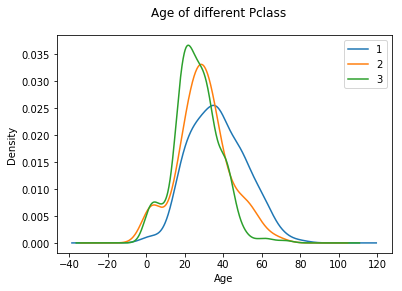

In [62]:
d_train.Age[d_train.Pclass == 1].plot(kind='kde')   
d_train.Age[d_train.Pclass == 2].plot(kind='kde')
d_train.Age[d_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.suptitle("Age of different Pclass")
plt.legend((1, 2, 3),loc='best') # sets our legend for our graph

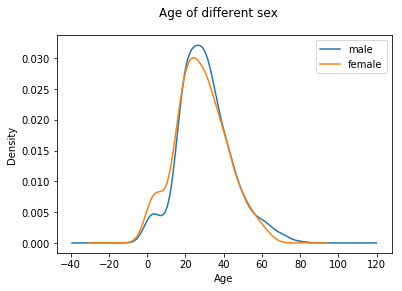

In [63]:
d_train.Age[d_train.Sex == 'male'].plot(kind='kde')   
d_train.Age[d_train.Sex == 'female'].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.suptitle("Age of different sex")
plt.legend(('male', 'female'),loc='best') # sets our legend for our graph

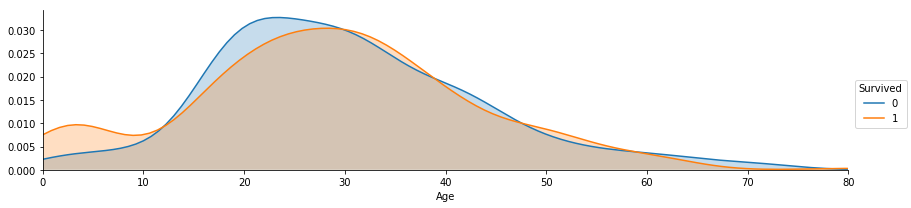

In [64]:
facet = sns.FacetGrid(d_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, d_train['Age'].max()))
facet.add_legend()

### According to the above graphs, age is an effect of survival. However, age has null. In order not to affect the following steps and not to lower the accuracy of the final prediction, we used randomforest to fill the age.
### Also, in order to classify people better in the Titanic, we created a new Row called Person, which classified people into four classes, including children who are under 14, and the elders who are older than 65, male and female. 

## 1.5 SibSp

In [65]:
d_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5,0.98,'Counts of SibSp')

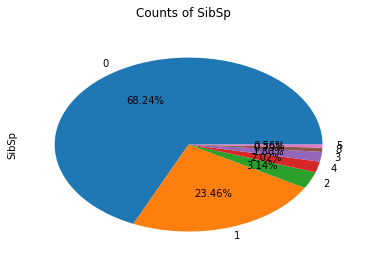

In [66]:
d_train['SibSp'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of SibSp')

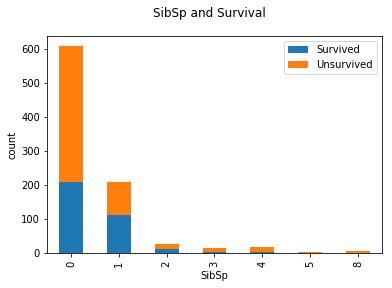

In [67]:
Survived_0 = d_train.SibSp[d_train.Survived == 0].value_counts()
Survived_1 = d_train.SibSp[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"SibSp and Survival")
plt.xlabel("SibSp") 
plt.ylabel("count") 
plt.show()

## 1.6 Parch

In [68]:
d_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5,0.98,'Counts of Parch')

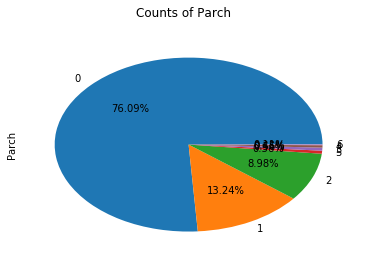

In [69]:
d_train['Parch'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.suptitle('Counts of Parch')

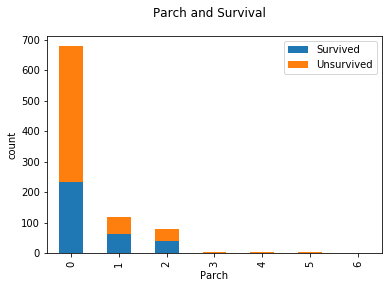

In [70]:
Survived_0 = d_train.Parch[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Parch[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Parch and Survival")
plt.xlabel("Parch") 
plt.ylabel("count") 
plt.show()

### Based on the graphs of SibSp and Parch, we thought these two kinds of data should be included into the features of inputs.

## 1.7 Fare

In [71]:
d_train['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

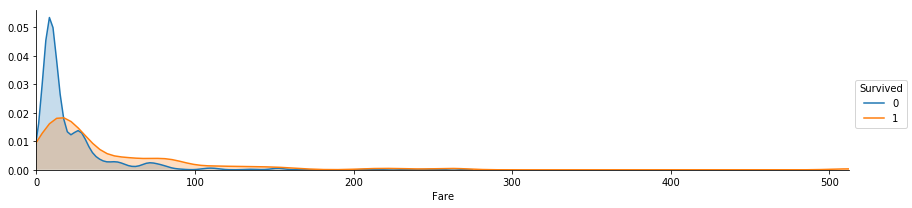

In [72]:
facet = sns.FacetGrid(d_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, d_train['Fare'].max()))
facet.add_legend()

## 1.8 Cabin

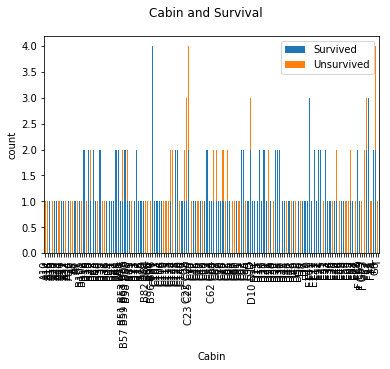

In [73]:
Survived_0 = d_train.Cabin[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Cabin[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Cabin and Survival")
plt.xlabel("Cabin") 
plt.ylabel("count") 
plt.show()

## 1.9 Embarked

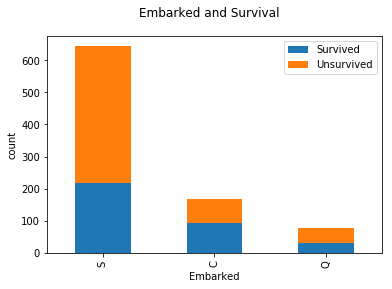

In [74]:
Survived_0 = d_train.Embarked[d_train.Survived == 0].value_counts()
Survived_1 = d_train.Embarked[d_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.suptitle(u"Embarked and Survival")
plt.xlabel("Embarked") 
plt.ylabel("count") 
plt.show()

### Based on the above Embarked, Fare and Cabin data, we failed to find relationship between these data and survival, but in order not to affect the accurcy, we added these data into the features of inputs.

# 2 Prepare and cleanse the data

### Based on the above analysis, we processed the data as the following shows.

In [76]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def modify(d_train):
    
    #Fare:
    if(d_train.Cabin.isnull().any()):
        d_train['Fare'].fillna(d_train['Fare'].value_counts().max(), inplace = True)
    
    #Age
    age_df = d_train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1::])
    d_train.loc[ (d_train.Age.isnull()), 'Age' ] = predictedAges 
    
    #Cabin
def set_Cabin_type(d_train):
    d_train.loc[ (d_train.Cabin.notnull()), 'Cabin' ] = "Yes"
    d_train.loc[ (d_train.Cabin.isnull()), 'Cabin' ] = "No"
    return d_train
d_train = set_Cabin_type(d_train)


In [77]:
#dummy variable
dummies_Cabin = pd.get_dummies(d_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(d_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(d_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(d_train['Pclass'], prefix= 'Pclass')

d_train = pd.concat([d_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
d_train.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
d_train


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,41.212068,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [80]:
d_test.loc[ (d_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = d_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[d_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
age_df = d_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
d_test.loc[ (d_test.Age.isnull()), 'Age' ] = predictedAges 

d_test = set_Cabin_type(d_test)
dummies_Cabin = pd.get_dummies(d_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(d_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(d_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(d_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([d_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# 3 Models

## 3.1 define x, y

In [89]:
from sklearn import linear_model
#Extract values we need with regular expressions
train_df = d_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y means survial
y_train = train_np[:, 0]

# X means feature 
x_train = train_np[:, 1:]
x_test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

## 3.2 Model selection

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


def models():
    return [LogisticRegression(),
            SVC(),
            LinearSVC(),
            RandomForestClassifier(),
            KNeighborsClassifier(),
            GaussianNB(),
            DecisionTreeClassifier()]

In [84]:
def name(model):
    return model.__class__.__name__


def best_model(model2predict):
    score_df = series_best_first(model2predict)
    print(score_df)
    return score_df.keys()[0]


def series_best_first(model2predict):
    model2score = {k: v[1] for k, v in model2predict.items()}
    return pd.Series(model2score).sort_values(ascending=False)


def write_submission(predict, submission_csv):
    submission = pd.DataFrame({
        "PassengerId": d1_test["PassengerId"],
        "Survived": predict
    })
    submission.to_csv(submission_csv, index=False)
    return pd.read_csv(submission_csv).tail(10)

# 3.3 Model selection based on the logisticRegression

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission.csv')

[[243  23]
 [  5 147]]
the accuracy is : 0.9330143540669856


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


# 3.4 Model selection based on the KNeighborsClassifier

In [94]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission.csv')

[[246  20]
 [ 17 135]]
the accuracy is : 0.9114832535885168


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


# 3.5 Model selection based on the SVC

In [96]:
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission.csv')

[[266   0]
 [  6 146]]
the accuracy is : 0.9856459330143541


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


# 3.5 Model selection based on the LinearSVC

In [97]:
classifier = LinearSVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission.csv')

[[255  11]
 [  4 148]]
the accuracy is : 0.9641148325358851


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


# 3.6 Model selection based on the GaussianNB

In [98]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))
write_submission(y_pred, 'submission.csv')

[[214  52]
 [  5 147]]
the accuracy is : 0.8636363636363636


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


# 4.0 submission to Kaggle

# 5.0  Answer the below questions about SettingWithCopyWarning in pandas

## 5.0.1 What is SettingWithCopyWarning? Please summarize.

some actions in pandas can return a view of your data, and others will return a copy. This potentially causes problem when we try to make changes. Depending on what we're doing we might want to be modifying the original dataset, or we want to modify only the copied one. The warning is letting us know that our code may have done one, when we want it to have done the other.

## 5.0.2 How did you make sure that the warning is not applicable in your cases?

## 5.0.3 What can you do to avoid the warning according to the web? Please summarize.

1.To prevent the warning in this case, the solution is to explicitly tell pandas to make a copy when we create the new dataframe

2.The solution is simple: combine the chained operations into a single operation using loc so that pandas can ensure the original DataFrame is set. Pandas will always ensure that unchained set operations,

## 5.0.4 (extra points) What else can you do to avoid the warning? Please explain.

for example, when you want to create x_train, you can create a new dataframe for this x_train. such as

X_train = train[selected_features]---->X_train = DataFrame(train[selected_features])